In [37]:
import numpy as np
import pandas as pd 
import math
import sklearn
from sklearn.linear_model import Ridge
from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

In [2]:
#Load data
df = pd.read_csv('ecs171.dataset.txt', sep='\s')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [8]:
#Get Features
X = df.iloc[:,6:].values
Y = np.reshape(df.iloc[:,5].values , [194,1])
m = X.shape[0]
n = X.shape[1]
data = np.concatenate((X,Y), axis = 1)





# Objective 
## Report the confidence interval of predictor using bootstrap method



In [30]:
#Define some BootStrapping Parameters
n_iterations = 20
n_size = math.floor(0.9*m) 
            

In [31]:
#Run bootstrap iterations and get score using MSE score
mse_values = []
for i in range(n_iterations):
    Ridge_model = Ridge(alpha=1.5,normalize=True,max_iter=100) #define model
    train = resample(data, n_samples=n_size)  #Resample to get training data
    test = np.array([x for x in data if x.tolist() not in train.tolist()])   #Use everything else in test data
    X_train = train[:,:-1] 
    Y_train = train[:,-1]
    X_test = test[:,:-1]
    Y_test = test[:,-1]
    Ridge_model.fit(X_train,Y_train)
    test_prediction = Ridge_model.predict(X_test)
    mse_score = sklearn.metrics.mean_squared_error(Y_test,test_prediction)
    mse_values.append(mse_score)
    print(i)
    
    
    
    
    #print(train.shape)
    #print(test.shape)
    #print("here")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


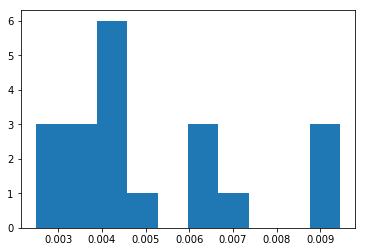

In [32]:
plt.figure()
plt.hist(mse_values)
plt.show()

In [36]:
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(mse_values, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(mse_values, p))
print('%.1f confidence interval %.1f and %.1f' % (alpha*100, lower*100, upper*100))

95.0 confidence interval 0.3 and 0.9
